# 🤖 Introduction to SVM & Decision Trees for AI Beginners

## 👋 Welcome to Your First AI Class!

Welcome! In this 2-hour session, we're going to explore two of the most important and foundational algorithms in machine learning: **Support Vector Machines (SVM)** and **Decision Trees**.

Don't worry if these names sound complicated. Our goal is to break them down into simple, easy-to-understand concepts with fun examples and hands-on practice. By the end of this session, you'll understand how they work and even build your own models!

### 🎯 Learning Objectives for Today:

1.  **Understand the core idea of SVM:** Finding the 'best' line to separate data.
2.  **Learn key SVM concepts:** Hyperplanes, Margins, Support Vectors, and the Kernel Trick.
3.  **Understand how Decision Trees work:** Making predictions like a flowchart.
4.  **Learn key Decision Tree concepts:** Nodes, Splits, Gini Impurity, and Pruning.
5.  **Write basic Python code** to build your own simple SVM and Decision Tree models using the `scikit-learn` library.
6.  **Practice and apply** your new knowledge with mini-tasks and a final assignment.

# PART 1: Support Vector Machine (SVM) SVM️⃣

### 📘 Topic 1: What is a Support Vector Machine?

A Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for **classification**. Imagine you have two groups of things (like apples and oranges) on a table, and you want to draw a line to separate them.

A simple line might work, but SVM tries to find the **optimal** line. What's optimal? It's the line that is as far away as possible from the closest apple and the closest orange. This gap is called the **margin**, and SVM's goal is to make it as wide as possible.

This "widest street" approach makes the model more confident and better at classifying new data it has never seen before!

**Key Idea:** SVM isn't just about separating data; it's about finding the most robust and confident separation boundary.

### 📘 Topic 2: Core Geometry - Hyperplanes, Margins & Support Vectors

Let's break down the three most important parts of an SVM:

-   **Hyperplane:** This is the fancy name for the decision boundary. In 2D, it's just a **line**. In 3D, it's a **flat plane**. In more than 3 dimensions, we call it a hyperplane.

-   **Support Vectors:** These are the data points from each class that are **closest** to the hyperplane. They are the most critical points because they *support* the hyperplane. If you moved a support vector, the hyperplane would move too! If you moved any other point, the hyperplane wouldn't change.

-   **Margin:** This is the distance between the hyperplane and the support vectors. SVM's goal is to **maximize this margin**.

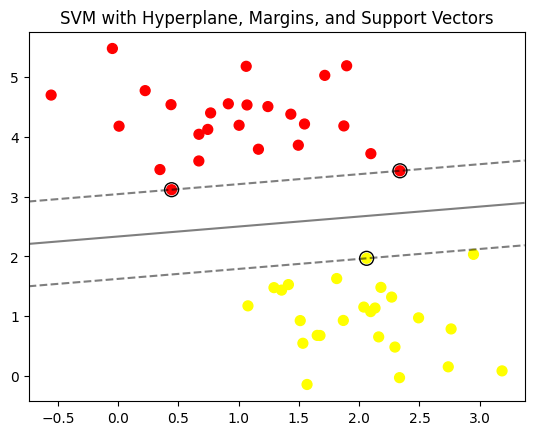

The points with black circles around them are the 'support vectors'. Notice how they define the dashed margin lines!


In [1]:
# Let's visualize this! We'll create some sample data and see what an SVM boundary looks like.
# We will use a famous library called 'scikit-learn' to do the heavy lifting for us.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# 1. Create some simple, linearly separable data
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# 2. Create and train the SVM model
# We use kernel='linear' for a straight-line boundary
model = SVC(kernel='linear', C=1E10) # High C for a hard margin
model.fit(X, y)

# 3. Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# 4. Plot the hyperplane and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# 5. Highlight the support vectors!
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title('SVM with Hyperplane, Margins, and Support Vectors')
plt.show()

print("The points with black circles around them are the 'support vectors'. Notice how they define the dashed margin lines!")

### 🧠 Practice Task: Understanding Support Vectors

Based on the plot above, answer this question:

**Why are only the 'Support Vectors' relevant to the final decision boundary? What would happen if we removed a point that is *not* a support vector?**

*(Think about it and discuss. No code needed here!)*

### 📘 Topic 3: Soft Margins and the 'C' Hyperparameter

Real-world data is messy and rarely perfectly separable. What if there's an outlier that makes it impossible to draw a perfect line?

This is where **Soft Margin SVM** comes in. We allow the model to make a few mistakes. We let some data points be inside the margin or even on the wrong side of the line, but we give it a penalty for each mistake.

This is controlled by a hyperparameter called **`C`**.

-   **High `C`:** A **strict** parent. It gives a **high penalty** for misclassification. The model will try very hard to separate everything correctly, which can lead to a narrow margin and **overfitting** (it learns the training data too well, but fails on new data).

-   **Low `C`:** A **lenient** parent. It gives a **low penalty** for mistakes. The model is happy to misclassify a few points in order to find a wider, more general margin. This can prevent overfitting but might lead to **underfitting** (being too simple).

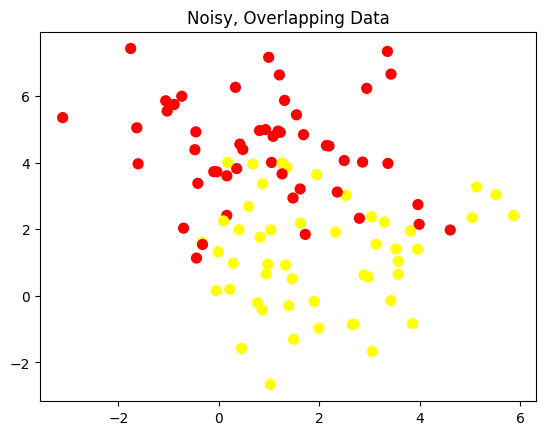

In [13]:
# Example: Let's see how changing 'C' affects the decision boundary

# First, let's create some data that is NOT perfectly separable
X_noisy, y_noisy = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.6)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, s=50, cmap='autumn')
plt.title('Noisy, Overlapping Data')
plt.show()

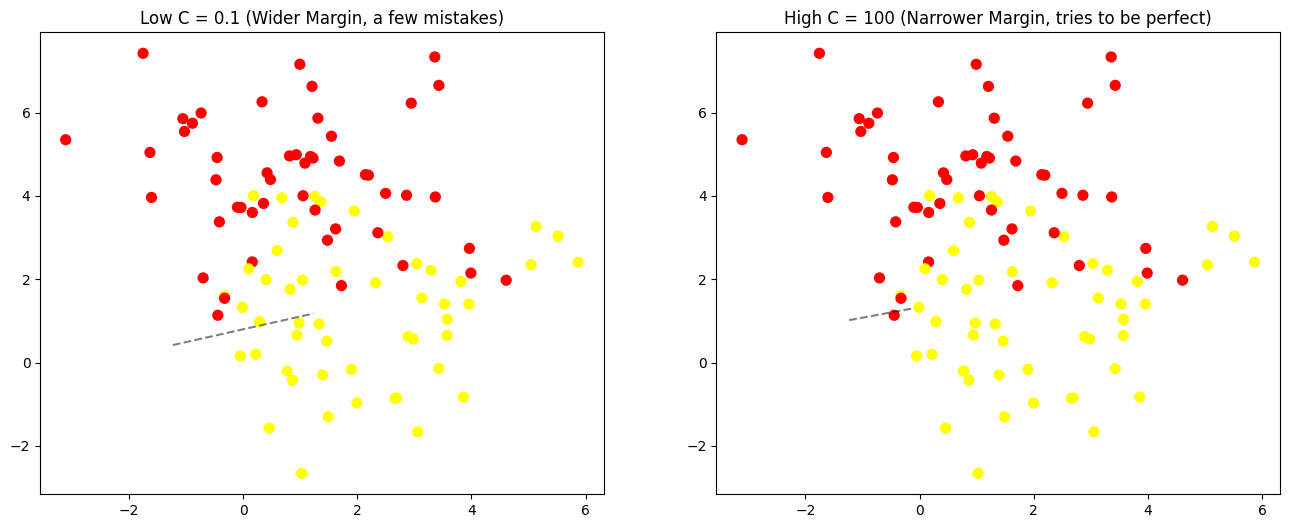

In [14]:
# Now let's train two SVMs: one with a low C and one with a high C
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Model 1: Low C (Lenient) ---
model_low_c = SVC(kernel='linear', C=0.1)
model_low_c.fit(X_noisy, y_noisy)

ax1.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, s=50, cmap='autumn')
Z1 = model_low_c.decision_function(xy).reshape(XX.shape)
ax1.contour(XX, YY, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.set_title('Low C = 0.1 (Wider Margin, a few mistakes)')

# --- Model 2: High C (Strict) ---
model_high_c = SVC(kernel='linear', C=100)
model_high_c.fit(X_noisy, y_noisy)

ax2.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, s=50, cmap='autumn')
Z2 = model_high_c.decision_function(xy).reshape(XX.shape)
ax2.contour(XX, YY, Z2, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title('High C = 100 (Narrower Margin, tries to be perfect)')

plt.show()

### 🧠 Practice Task: Adjusting the 'C' Parameter

If your SVM model is **overfitting** (it learned the training data perfectly but does poorly on new test data), how should you adjust the 'C' parameter?

A) Increase C to make it stricter.
B) **Decrease C** to allow for a wider, more general margin.

**Think about it!** The answer is B. Overfitting means the model is too specific, so we want to make it more lenient and general by decreasing `C`.

### ✅ Well done! You now understand how SVM handles noise and complexity.

### 📘 Topic 4: The Kernel Trick (Handling Non-Linear Data)

What if your data isn't separable by a straight line at all? Imagine a circle of red dots inside a ring of blue dots.

This is where SVM's superpower comes in: the **Kernel Trick**. 

Instead of trying to find a line in the current dimension (2D), SVM can project the data into a **higher dimension** where it *becomes* linearly separable. 

**Analogy:** Imagine red and blue dots mixed on a flat piece of paper. You can't draw a line to separate them. But if you could magically lift the red dots up into the air (a 3rd dimension), you could easily slide a clean sheet of paper (a plane) between the red and blue dots!

The **kernel** is a special mathematical function that does this without actually doing the expensive computation of transforming the data. It's a clever shortcut!

**Popular Kernels:**
-   `linear`: For data that is already mostly separable by a line.
-   `poly`: For curved boundaries.
-   `rbf` (Radial Basis Function): The most popular and powerful default. It can create complex, circular boundaries.

In [25]:
# Example: Let's create non-linear data and see the RBF kernel in action!
from sklearn.datasets import make_circles

X_circ, y_circ = make_circles(100, factor=.1, noise=.1)

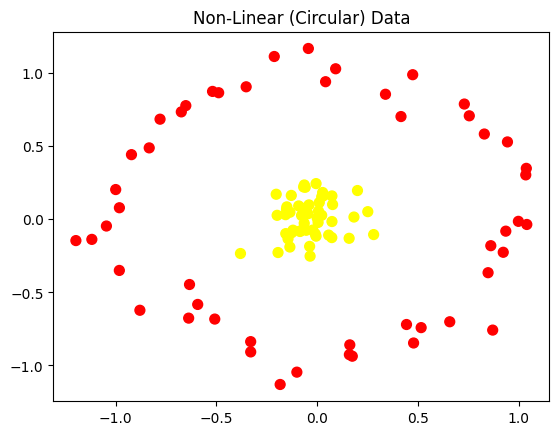

You can't draw a straight line to separate these two classes!


In [26]:
plt.scatter(X_circ[:, 0], X_circ[:, 1], c=y_circ, s=50, cmap='autumn')
plt.title('Non-Linear (Circular) Data')
plt.show()

print("You can't draw a straight line to separate these two classes!")

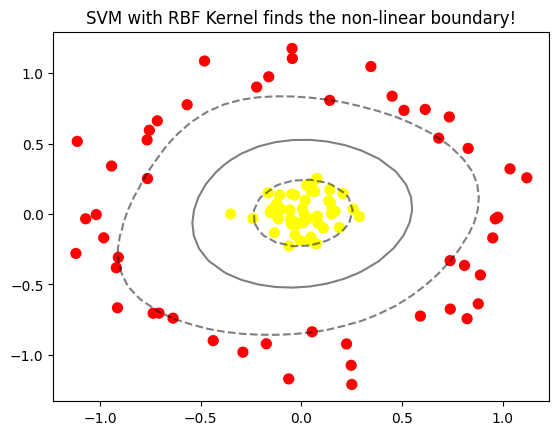

In [6]:
# Now, train an SVM with the 'rbf' kernel
model_rbf = SVC(kernel='rbf') # RBF is the default for SVC
model_rbf.fit(X_circ, y_circ)

# Plot the result
plt.scatter(X_circ[:, 0], X_circ[:, 1], c=y_circ, s=50, cmap='autumn')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_rbf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM with RBF Kernel finds the non-linear boundary!')
plt.show()

### 🧠 Practice Task: Choose the Right Kernel

You are working on a bioinformatics project to classify proteins based on complex folding structures. The relationships between features are highly non-linear.

Which SVM kernel would be your first choice to try?
A) `linear`
B) `rbf`
C) It doesn't matter.

*(Hint: RBF is great for complex, non-linear patterns!)*

## 💡 Fun Fact!

SVMs are widely used in high-stakes applications like **face detection** in images, **handwriting recognition**, and **text categorization** (like sorting news articles into 'sports', 'politics', etc.). Their ability to work well in high-dimensional spaces makes them perfect for text, where every word can be a dimension!

# PART 2: Decision Trees 🌳

### 📘 Topic 5: What is a Decision Tree? (And its Anatomy)

A Decision Tree is one of the most intuitive machine learning models. It works just like a **flowchart** of questions to arrive at a decision.

It breaks down a dataset into smaller and smaller subsets by asking simple questions about the features. The best part? You can visualize the tree and see *exactly* why the model made its prediction, making it very interpretable (not a "black box").

**Anatomy of a Tree:**
-   **Root Node:** The very top node, representing the whole dataset. It's the first split.
-   **Decision / Internal Node:** A node that asks a question (e.g., "Is Age > 50?").
-   **Branch:** The path you take based on the answer (e.g., "Yes" or "No").
-   **Leaf / Terminal Node:** The end of a branch. It holds the final prediction (e.g., "High Risk").

Here is our raw data:


,Outlook,Humidity,Wind,PlayTennis
0,Sunny,High,Weak,No
1,Sunny,High,Strong,No
2,Overcast,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Weak,Yes
5,Rain,Normal,Strong,No
6,Overcast,Normal,Strong,Yes
7,Sunny,High,Weak,No
8,Sunny,Normal,Weak,Yes
9,Rain,Normal,Weak,Yes



Here is the data after converting to numbers:


,Outlook,Humidity,Wind,PlayTennis
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,0,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


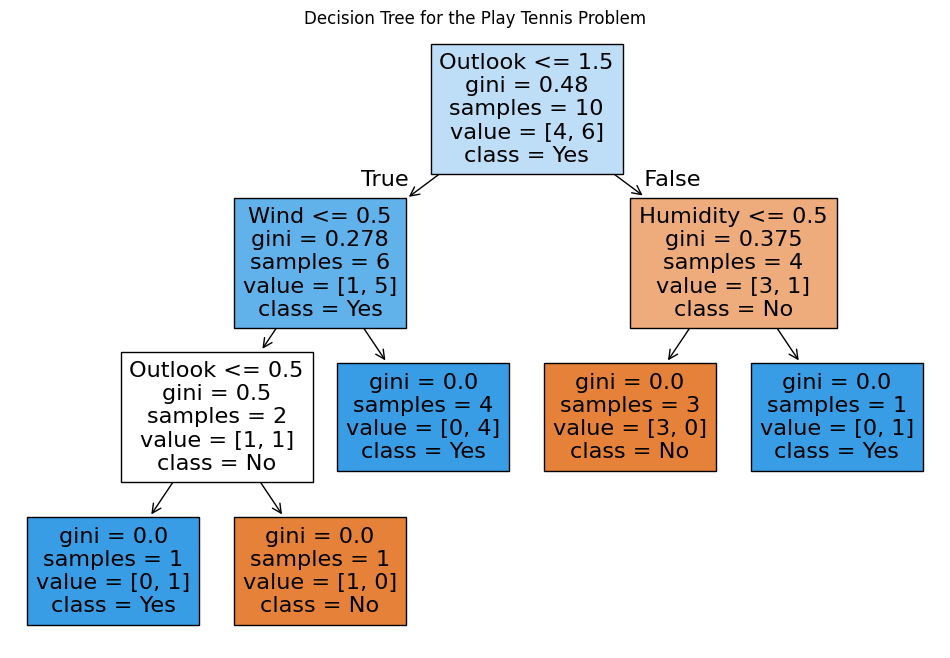

In [7]:
# Example: Let's create a Decision Tree for the famous 'Play Tennis' problem.

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# 1. Create the dataset based on the example
data = {'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
        'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak'],
        'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']}
df = pd.DataFrame(data)

print("Here is our raw data:")
display(df)

# 2. Convert text data to numbers so the model can understand it
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

print("\nHere is the data after converting to numbers:")
display(df_encoded)

# 3. Separate features (X) and target (y)
X_tree = df_encoded.drop('PlayTennis', axis=1)
y_tree = df_encoded['PlayTennis']

# 4. Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(criterion='gini')
tree_model.fit(X_tree, y_tree)

# 5. Visualize the tree!
plt.figure(figsize=(12,8))
plot_tree(tree_model, feature_names=X_tree.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree for the Play Tennis Problem')
plt.show()

### 🧠 Practice Task: Understanding the Tree Structure

Look at the tree visualization above. 
1. What is the **Root Node** (the very first question the tree asks)?
2. Find one **Leaf Node**. What prediction does it make (Play 'Yes' or Play 'No')?

### 📘 Topic 6: How Trees Learn - Splitting Criteria

How does the tree decide which question to ask first? (e.g., why 'Outlook' and not 'Wind'?)

The goal is to ask questions that create the most **"pure"** child nodes. A pure node is one where all the samples belong to a single class (e.g., all 'Yes' or all 'No').

We use a mathematical metric to measure impurity. The most common one is **Gini Impurity**.

**Gini Impurity:** Measures the probability of incorrectly classifying a randomly chosen item from the node.
-   A Gini score of **0** is perfect purity (all samples are the same class).
-   A Gini score of **0.5** is maximum impurity (in a two-class problem, it's a 50/50 split).

At each step, the tree calculates the Gini Impurity for every possible split and chooses the split that results in the **lowest Gini Impurity** in the child nodes.

### 🧠 Practice Task: Calculate Gini Impurity

Imagine a node has 10 observations: **[9 'Yes', 1 'No']**. Calculate its Gini Impurity.

The formula is: `Gini = 1 - (p_yes^2 + p_no^2)`

Where `p_yes` is the probability of 'Yes' and `p_no` is the probability of 'No'.

Try calculating it in the code cell below!

In [8]:
# 🧪 Try changing the values to see how the Gini score changes!

# Probabilities for our node [9 Yes, 1 No]
p_yes = 9 / 10
p_no = 1 / 10

# Calculate Gini Impurity
gini = 1 - (p_yes**2 + p_no**2)

print(f"The probability of 'Yes' is: {p_yes}")
print(f"The probability of 'No' is: {p_no}")
print(f"The Gini Impurity is: {gini:.2f}")

print("\nThis is a low Gini score, which means the node is quite pure!")

The probability of 'Yes' is: 0.9
The probability of 'No' is: 0.1
The Gini Impurity is: 0.18

This is a low Gini score, which means the node is quite pure!


### ✅ Excellent! You've mastered how a tree makes its decisions.

### 📘 Topic 7: The Danger of Overfitting & Pruning

Decision Trees have a big weakness: they love to **memorize** the training data. If you don't control them, a tree will keep growing until every single leaf node is 100% pure. 

This sounds good, but it's actually terrible! The tree learns all the noise and specific quirks of the training data, and it won't be able to make good predictions on new, unseen data. This is called **overfitting**.

To prevent this, we use **Pruning**, which is just a fancy word for cutting back the tree.

The easiest way is **Pre-pruning**: we stop the tree from growing too deep. We can set rules like:
-   `max_depth`: The maximum number of levels the tree can have (e.g., `max_depth=3`).
-   `min_samples_leaf`: The minimum number of data points required to be in a leaf node.

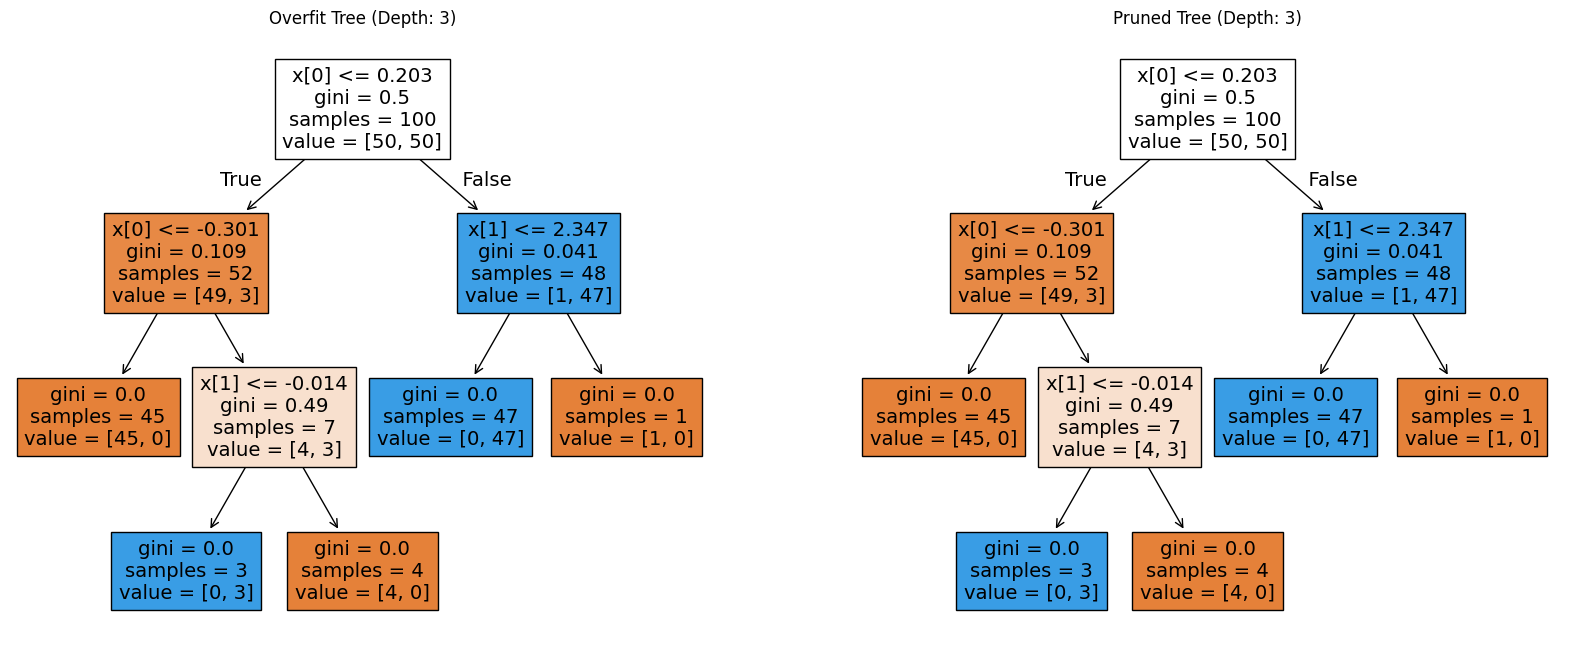

Notice how the left tree is much larger and more complex. It's likely overfitting! The pruned tree on the right is simpler and will probably perform better on new data.


In [9]:
# Example: Let's compare a full tree with a pruned tree
from sklearn.datasets import make_classification

# Create more complex data where overfitting is possible
X_complex, y_complex = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# --- Tree 1: No limits (Overfit) ---
tree_overfit = DecisionTreeClassifier(random_state=42)
tree_overfit.fit(X_complex, y_complex)

# --- Tree 2: Pruned with max_depth=3 ---
tree_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_pruned.fit(X_complex, y_complex)

# Visualize both trees
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

plot_tree(tree_overfit, ax=ax1, filled=True)
ax1.set_title(f'Overfit Tree (Depth: {tree_overfit.get_depth()})')

plot_tree(tree_pruned, ax=ax2, filled=True)
ax2.set_title(f'Pruned Tree (Depth: {tree_pruned.get_depth()})')

plt.show()

print("Notice how the left tree is much larger and more complex. It's likely overfitting! The pruned tree on the right is simpler and will probably perform better on new data.")

### 🧠 Practice Task: Diagnosing Overfitting

You train a Decision Tree with no depth limit. You get **100% accuracy on your training data**, but only **60% accuracy on your test data**.

What has likely happened, and what is the first thing you should try to fix it?

*(Hint: Think about the trade-off between training and test accuracy. What does `max_depth` control?)*

# 🏡 Final Revision Assignment

Congratulations on making it to the end! Now it's time to combine everything you've learned. We will use the famous **Iris dataset**, which contains measurements for 3 different species of iris flowers.

Your goal is to build both an SVM and a Decision Tree model to classify the flowers.

In [ ]:
# First, let's load the data and split it into training and testing sets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

print(f"We have {X_train.shape[0]} samples for training and {X_test.shape[0]} samples for testing.")

### ⭐ Task 1: Train a Decision Tree Classifier

Create a `DecisionTreeClassifier` with `max_depth=4` and `random_state=42`. Train it on the `X_train` and `y_train` data.

In [ ]:
# Your code here for Task 1
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree model trained successfully!")

### ⭐ Task 2: Evaluate the Decision Tree

Use your trained `dt_classifier` to make predictions on the `X_test` data. Then, calculate and print the accuracy score by comparing your predictions to the true labels (`y_test`).

In [ ]:
# Your code here for Task 2
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"Decision Tree Test Accuracy: {dt_accuracy * 100:.2f}%")

### ⭐ Task 3: Train an SVM Classifier

Create an `SVC` (Support Vector Classifier) with `kernel='rbf'`, `C=1.0`, and `random_state=42`. Train it on the `X_train` and `y_train` data.

In [ ]:
# Your code here for Task 3
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

print("SVM model trained successfully!")

### ⭐ Task 4: Evaluate the SVM Classifier

Just like you did for the Decision Tree, use the trained `svm_classifier` to make predictions on `X_test` and print its accuracy.

In [ ]:
# Your code here for Task 4
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"SVM Test Accuracy: {svm_accuracy * 100:.2f}%")

### ⭐ Task 5: Experiment and Compare!

Which model performed better on the test data? 

Now, try to change one hyperparameter for each model and see if you can improve the score!
-   For the Decision Tree, try changing `max_depth` to `2` or `5`.
-   For the SVM, try changing `C` to `0.1` or `10`.

Re-run the training and evaluation steps. Did the accuracy change? This process of tweaking hyperparameters is a huge part of being a machine learning engineer!

## 🎉 Congratulations! 🎉

You have successfully completed this introductory session on SVMs and Decision Trees. You've learned the theory, seen visual examples, and applied your knowledge to a real dataset. This is a fantastic first step into the world of AI and Machine Learning!

Keep experimenting and happy coding!